In [ ]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

In [4]:
# Download latest version
path = kagglehub.dataset_download("sgpjesus/bank-account-fraud-dataset-neurips-2022")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\DOliv\.cache\kagglehub\datasets\sgpjesus\bank-account-fraud-dataset-neurips-2022\versions\2


In [5]:
df = pd.read_csv(path + "\Base.csv")
print("Dataset loaded successfully.")
print(df.head())

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\DOliv\AppData\Local\Temp\ipykernel_19620\2552186847.py:1: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv(path + "\Base.csv")


Dataset loaded successfully.
   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
df.describe(include='all')

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000,1000000.000000,1000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB,NaN,...,NaN,NaN,NaN,INTERNET,NaN,other,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370554,NaN,...,NaN,NaN,NaN,992952,NaN,342728,NaN,NaN,NaN,NaN
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,NaN,1572.692049,...,0.222988,515.851010,0.025242,NaN,7.544940,NaN,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,NaN,1005.374565,...,0.416251,487.559902,0.156859,NaN,8.033106,NaN,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,NaN,1.000000,...,0.000000,190.000000,0.000000,NaN,-1.000000,NaN,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,NaN,894.000000,...,0.000000,200.000000,0.000000,NaN,3.103053,NaN,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,NaN,1263.000000,...,0.000000,200.000000,0.000000,NaN,5.114321,NaN,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,NaN,1944.000000,...,0.000000,500.000000,0.000000,NaN,8.866131,NaN,1.000000,1.000000,0.0,5.000000


In [8]:
df[df['fraud_bool'] == 1].head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
43,1,0.9,0.570800,-1,157,60,0.005908,35.337538,AA,4079,...,0,1500.0,0,INTERNET,4.036394,windows,1,1,0,0
140,1,0.1,0.993219,-1,67,20,0.015331,92.120139,AA,1192,...,0,1500.0,0,INTERNET,12.928072,windows,0,1,0,0
284,1,0.8,0.794351,-1,376,60,17.925951,41.422110,AA,815,...,0,1500.0,0,INTERNET,2.550167,linux,0,1,0,0
314,1,0.7,0.090000,-1,58,50,0.004134,-1.244047,AD,4011,...,0,1500.0,0,INTERNET,3.500856,windows,0,1,0,0
561,1,0.9,0.998248,31,45,30,0.010165,33.067538,AA,525,...,1,2000.0,0,INTERNET,44.536211,windows,0,1,0,0
679,1,0.9,0.763127,-1,252,30,0.010031,-1.049850,AB,2390,...,0,200.0,1,INTERNET,37.803402,linux,1,1,0,0
728,1,0.6,0.254250,-1,187,60,0.007115,-1.112033,AB,1040,...,0,1500.0,0,INTERNET,11.148815,windows,1,2,0,0
890,1,0.8,0.129198,-1,182,60,0.009373,20.003508,AA,4429,...,0,500.0,0,INTERNET,36.809555,windows,0,1,0,0
1097,1,0.9,0.128284,-1,138,30,1.502816,32.820852,AA,3288,...,1,1500.0,0,INTERNET,5.199206,linux,0,1,0,0
1139,1,0.1,0.120051,-1,62,30,0.009814,48.951723,AA,2294,...,0,200.0,0,INTERNET,31.086788,other,1,1,0,0


In [9]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [10]:
df['name_email_similarity'].unique()

array([0.98650631, 0.61742601, 0.99670702, ..., 0.14089138, 0.00248024,
       0.99339133], shape=(998861,))

In [11]:
print(df['fraud_bool'].value_counts())

fraud_bool
0    988971
1     11029
Name: count, dtype: int64


In [12]:
df_stud = df.copy()

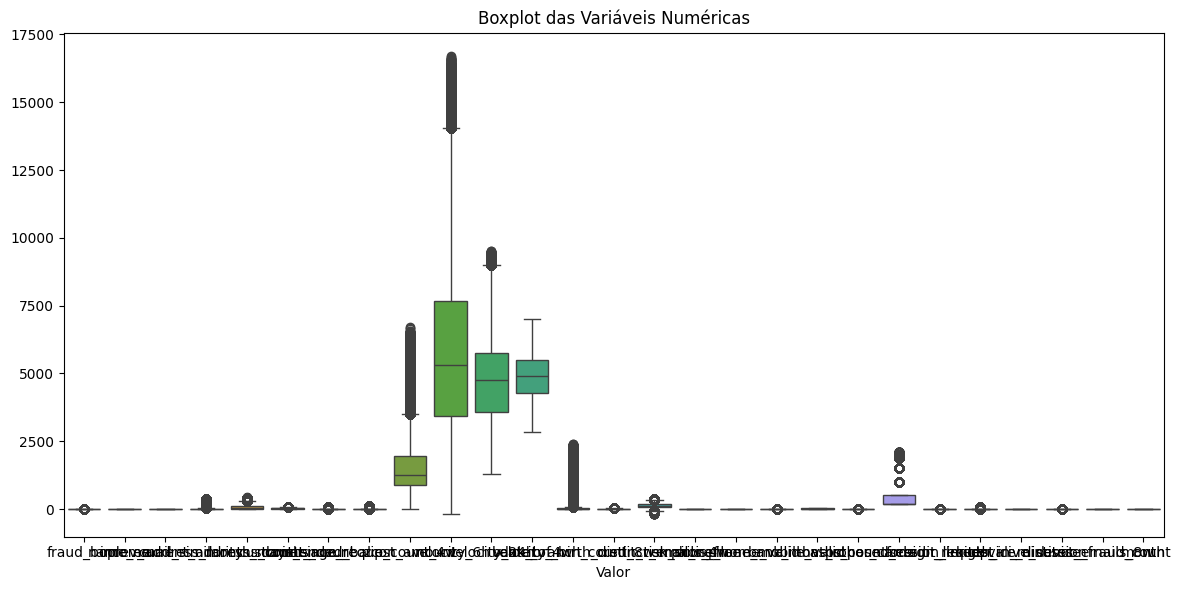

In [13]:
# Criar o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_stud, orient="v")
plt.title("Boxplot das Variáveis Numéricas")
plt.xlabel("Valor")
plt.tight_layout()

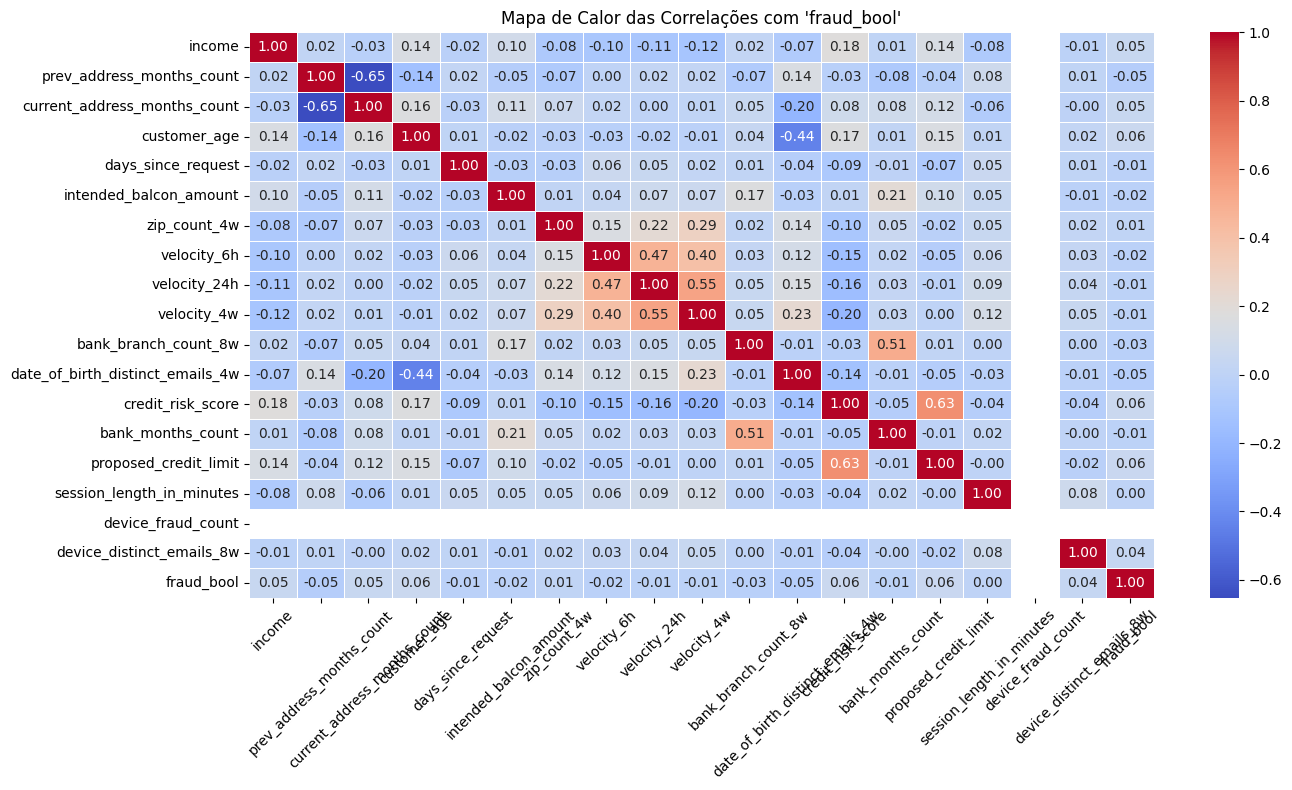

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna target para inteiro (caso ainda não esteja)
df['fraud_bool'] = df['fraud_bool'].astype(int)

# Lista de colunas numéricas para análise de correlação
cols = [
    'income', 'prev_address_months_count', 'current_address_months_count',
    'customer_age', 'days_since_request', 'intended_balcon_amount',
    'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
    'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
    'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',
    'session_length_in_minutes', 'device_fraud_count',
    'device_distinct_emails_8w', 'fraud_bool'
]

# Filtrar as colunas e garantir que são todas numéricas
df_numeric = df[cols].apply(pd.to_numeric, errors='coerce')

# Remover linhas com valores ausentes
df_clean = df_numeric.dropna()

# Calcular a matriz de correlação (Spearman é ideal para lidar com variáveis não normalizadas)
correlation_matrix = df_clean.corr(method='spearman')

# Plotar o heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor das Correlações com 'fraud_bool'")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [15]:
df_test = df.copy()

In [16]:
print(df_stud.dtypes)


fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

Codificando colunas categóricas: 100%|██████████| 5/5 [00:00<00:00,  8.79it/s]


Treinando modelo...

📊 Matriz de Confusão:
[[197793      1]
 [  2201      5]]

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9890    1.0000    0.9945    197794
           1     0.8333    0.0023    0.0045      2206

    accuracy                         0.9890    200000
   macro avg     0.9112    0.5011    0.4995    200000
weighted avg     0.9873    0.9890    0.9835    200000



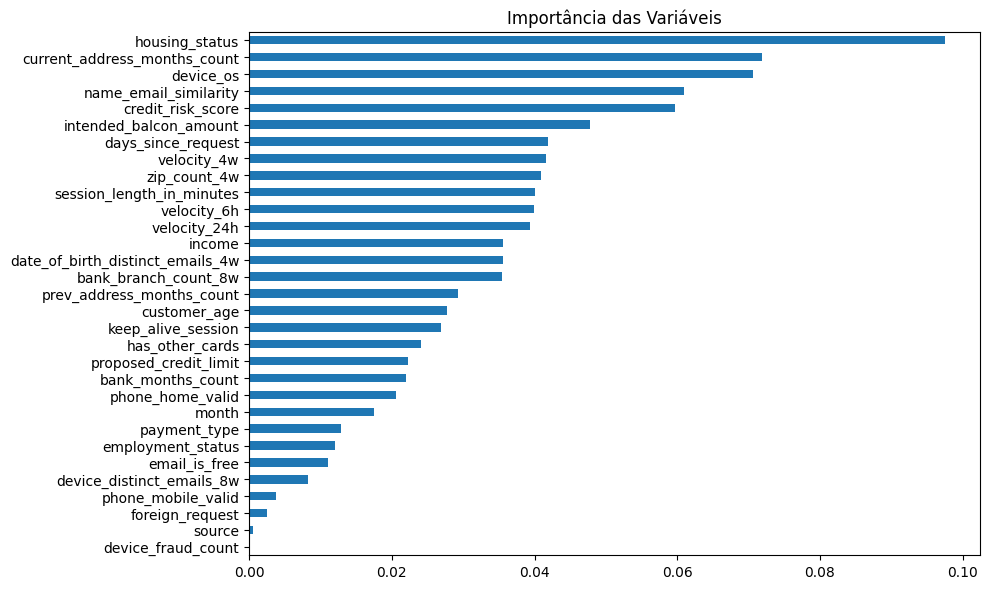

In [17]:
# Ativar barra de progresso
tqdm.pandas()

# Cópia do dataset
df_import = df.copy()

# Codificação de colunas categóricas
for col in tqdm(df_import.select_dtypes(include='object').columns, desc="Codificando colunas categóricas"):
    df_import[col] = LabelEncoder().fit_transform(df_import[col].astype(str))

# Conversão de colunas booleanas
for col in df_import.select_dtypes(include='bool').columns:
    df_import[col] = df_import[col].astype(int)

# Separar features e target
X = df_import.drop(columns=['fraud_bool'])
y = df_import['fraud_bool']

# Dividir com estratificação para manter proporção da classe
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Modelo com class_weight para lidar com desbalanceamento
print("Treinando modelo...")
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
model.fit(X_train, y_train)

# Avaliação
y_pred = model.predict(X_test)

print("\n📊 Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Importância das variáveis
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot.barh(figsize=(10, 6), title="Importância das Variáveis")
plt.tight_layout()
plt.show()

In [18]:
df['housing_status'].unique()

array(['BC', 'BE', 'BD', 'BA', 'BB', 'BF', 'BG'], dtype=object)

tratamento apos limpesa dos dados

In [19]:
# Calcular matriz de correlação
correlation_matrix = df_clean.corr()

# Visualizar as 10 variáveis mais correlacionadas com is_fraud
correlation_matrix['fraud_bool'].sort_values(ascending=False).head(10)


fraud_bool                      1.000000
credit_risk_score               0.070624
proposed_credit_limit           0.068907
customer_age                    0.062959
income                          0.045079
device_distinct_emails_8w       0.035704
current_address_months_count    0.033701
session_length_in_minutes       0.008999
zip_count_4w                    0.005212
days_since_request              0.000567
Name: fraud_bool, dtype: float64

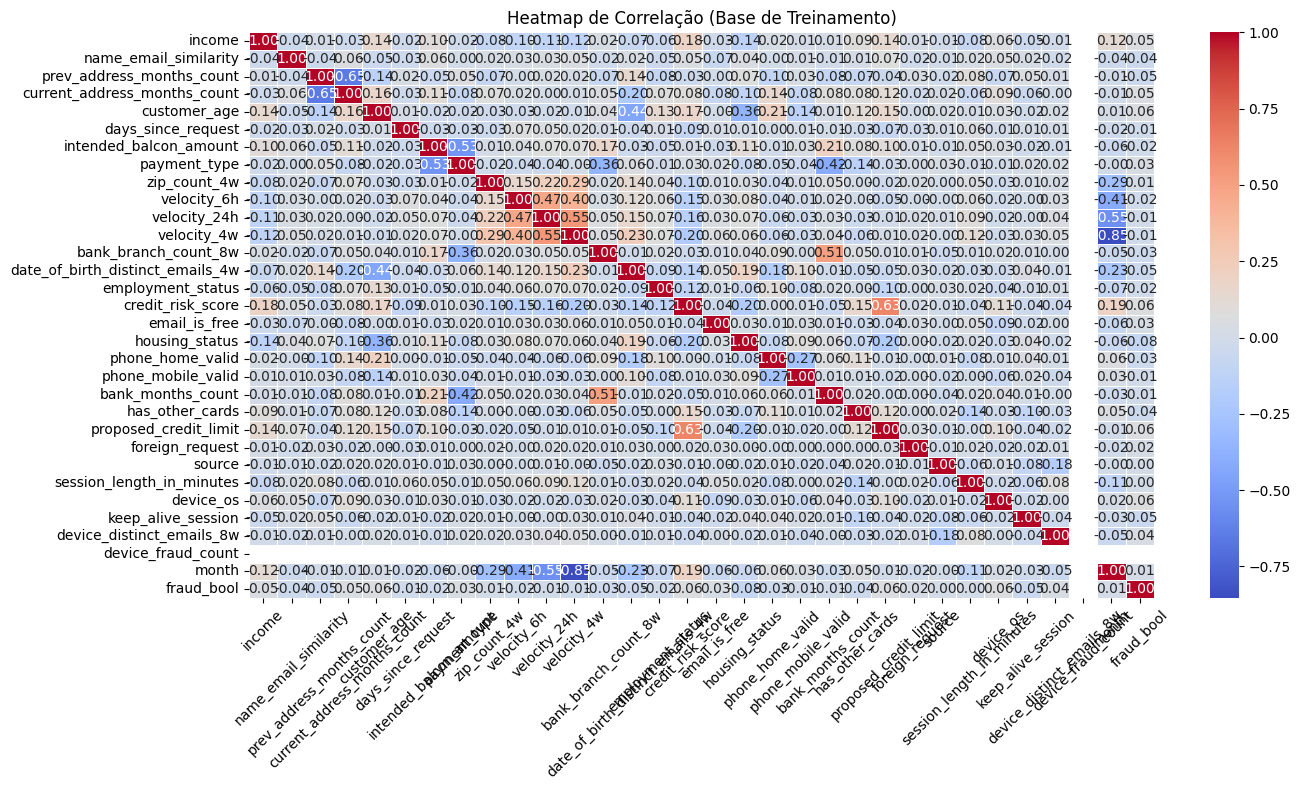

In [20]:
# Adiciona a coluna target de volta para o heatmap
df_train_corr = X_train.copy()
df_train_corr['fraud_bool'] = y_train

# Filtra apenas colunas numéricas
df_corr_numeric = df_train_corr.select_dtypes(include='number')

# Calcula a correlação (Spearman é robusta a distribuições não lineares)
correlation_matrix = df_corr_numeric.corr(method='spearman')

# Plot do heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlação (Base de Treinamento)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
df_columns = df_clean.columns.tolist()
df_columns

['income',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes',
 'device_fraud_count',
 'device_distinct_emails_8w',
 'fraud_bool']

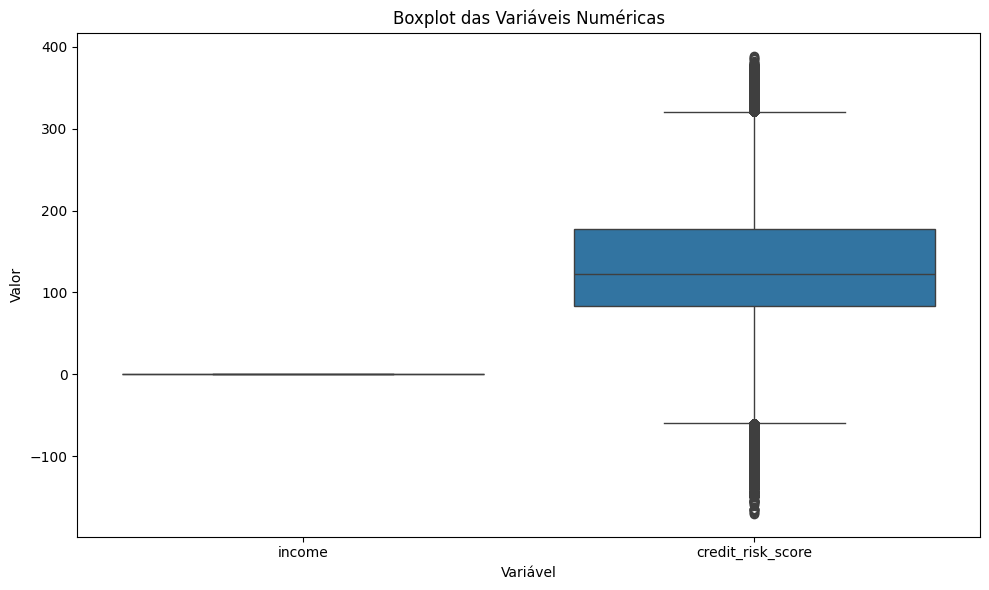

In [22]:
# Selecionar colunas numéricas
cols = ['income', 'credit_risk_score']
df_box = df_stud[cols].copy()

# Converter para formato longo (melt)
df_long = df_box.melt(var_name='Variável', value_name='Valor')

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_long, x='Variável', y='Valor')
plt.title("Boxplot das Variáveis Numéricas")
plt.tight_layout()
plt.show()


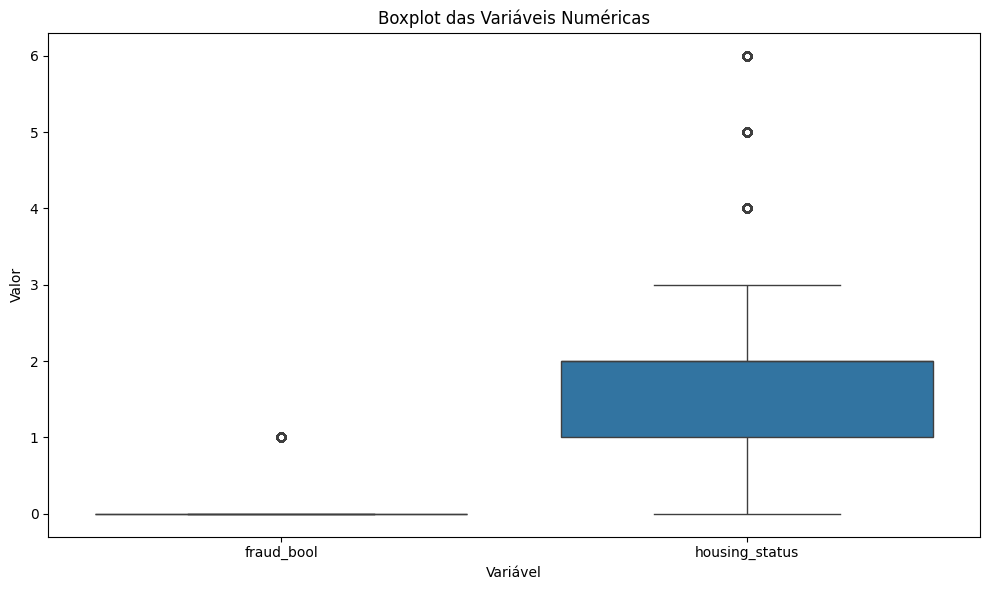

In [23]:
# Selecionar colunas numéricas
cols = ['fraud_bool', 'housing_status']
df_box = df_stud[cols].copy()
#tratar o dado housing_status para ser numérico
df_box['housing_status'] = df_box['housing_status'].astype('category').cat.codes
# Converter para formato longo (melt)
df_long = df_box.melt(var_name='Variável', value_name='Valor')

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_long, x='Variável', y='Valor')
plt.title("Boxplot das Variáveis Numéricas")
plt.tight_layout()
plt.show()


In [24]:
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [26]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
import pandas as pd

# Iniciar H2O
h2o.init(max_mem_size="4G")  # define limite de memória

# Amostragem (se necessário)
df_sampled = df_import.sample(n=50000, random_state=42)  # ou menos, para acelerar

# Remover colunas de baixa utilidade (exemplo: IDs, chaves hash, etc.)
colunas_descartar = ['device_hash', 'account_id'] if 'device_hash' in df_sampled.columns else []
df_sampled = df_sampled.drop(columns=colunas_descartar, errors='ignore')

# Dividir dados
X = df_sampled.drop(columns=['fraud_bool'])
y = df_sampled['fraud_bool']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Criar frames H2O
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Definir target e features
target = 'fraud_bool'
features = [col for col in train.columns if col != target]

# Garantir tipo do target
train[target] = train[target].asfactor()
test[target] = test[target].asfactor()

# Rodar AutoML com tempo limitado (ex: 5 min)
aml = H2OAutoML(max_models=10, max_runtime_secs=300, seed=42)
aml.train(x=features, y=target, training_frame=train)

# Mostrar ranking
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

# Melhor modelo
melhor_modelo = aml.leader


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,34 mins 36 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 9 days
H2O_cluster_name:,H2O_from_python_DOliv_hrovjg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.061 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
23:17:45.675: AutoML: XGBoost is not available; skipping it.
23:17:45.677: _train param, Dropping bad and constant columns: [device_fraud_count]
23:17:47.993: _train param, Dropping bad and constant columns: [device_fraud_count]

██
23:17:51.389: _train param, Dropping bad and constant columns: [device_fraud_count]

█
23:17:57.619: _train param, Dropping bad and constant columns: [device_fraud_count]

██
23:18:00.213: _train param, Dropping bad and constant columns: [device_fraud_count]
23:18:02.822: _train param, Dropping bad and constant columns: [device_fraud_count]

██
23:18:05.353: _train param, Dropping bad and constant columns: [device_fraud_count]

███
23:18:12.264: _train param, Dropping bad and constant columns: [device_fraud_count]

██
23:18:14.187: _train param, Dropp

In [27]:
h2o.save_model(model=aml.leader, path=".", force=True)


'D:\\pc\\PosDados\\handsOn\\Fraudes-Financeiras\\StackedEnsemble_AllModels_1_AutoML_2_20250605_231745'

In [28]:
preds = aml.predict(test)
preds.as_data_frame().head()


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


d:\pc\PosDados\handsOn\Fraudes-Financeiras\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,predict,p0,p1
0,0,0.998919,0.001081
1,0,0.987051,0.012949
2,0,0.990436,0.009564
3,0,0.981208,0.018792
4,0,0.994883,0.005117


In [29]:
perf = aml.leader.model_performance(test_data=test)
print(perf.confusion_matrix())
print(perf.auc())  # ou perf.F1(), perf.precision(), perf.recall()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19835796616975168
       0      1    Error    Rate
-----  -----  ---  -------  ---------------
0      12330  48   0.0039   (48.0/12378.0)
1      106    16   0.8689   (106.0/122.0)
Total  12436  64   0.0123   (154.0/12500.0)
0.8356149461365882


In [30]:
aml.leaderboard['model_id'].as_data_frame()


d:\pc\PosDados\handsOn\Fraudes-Financeiras\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,model_id
0,StackedEnsemble_AllModels_1_AutoML_2_20250605_...
1,StackedEnsemble_BestOfFamily_1_AutoML_2_202506...
2,GLM_1_AutoML_2_20250605_231745
3,GBM_2_AutoML_2_20250605_231745
4,GBM_1_AutoML_2_20250605_231745
5,GBM_5_AutoML_2_20250605_231745
6,GBM_3_AutoML_2_20250605_231745
7,GBM_grid_1_AutoML_2_20250605_231745_model_1
8,GBM_4_AutoML_2_20250605_231745
9,DeepLearning_1_AutoML_2_20250605_231745


In [31]:
for model_id in aml.leaderboard['model_id'].as_data_frame().values.flatten():
    model = h2o.get_model(model_id)
    print(f"🔎 Modelo: {model_id} — Tipo: {model.algo}")


d:\pc\PosDados\handsOn\Fraudes-Financeiras\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


🔎 Modelo: StackedEnsemble_AllModels_1_AutoML_2_20250605_231745 — Tipo: stackedensemble
🔎 Modelo: StackedEnsemble_BestOfFamily_1_AutoML_2_20250605_231745 — Tipo: stackedensemble
🔎 Modelo: GLM_1_AutoML_2_20250605_231745 — Tipo: glm
🔎 Modelo: GBM_2_AutoML_2_20250605_231745 — Tipo: gbm
🔎 Modelo: GBM_1_AutoML_2_20250605_231745 — Tipo: gbm
🔎 Modelo: GBM_5_AutoML_2_20250605_231745 — Tipo: gbm
🔎 Modelo: GBM_3_AutoML_2_20250605_231745 — Tipo: gbm
🔎 Modelo: GBM_grid_1_AutoML_2_20250605_231745_model_1 — Tipo: gbm
🔎 Modelo: GBM_4_AutoML_2_20250605_231745 — Tipo: gbm
🔎 Modelo: DeepLearning_1_AutoML_2_20250605_231745 — Tipo: deeplearning
🔎 Modelo: XRT_1_AutoML_2_20250605_231745 — Tipo: drf
🔎 Modelo: DRF_1_AutoML_2_20250605_231745 — Tipo: drf


In [32]:
ensemble_model = h2o.get_model('StackedEnsemble_AllModels_1_AutoML_2_20250605_231745')
print(ensemble_model.base_models)


['GLM_1_AutoML_2_20250605_231745', 'GBM_2_AutoML_2_20250605_231745', 'GBM_1_AutoML_2_20250605_231745', 'GBM_5_AutoML_2_20250605_231745', 'GBM_3_AutoML_2_20250605_231745', 'GBM_grid_1_AutoML_2_20250605_231745_model_1', 'GBM_4_AutoML_2_20250605_231745', 'DeepLearning_1_AutoML_2_20250605_231745', 'XRT_1_AutoML_2_20250605_231745', 'DRF_1_AutoML_2_20250605_231745']


## fazendo meu proprio modelo apos o AutoML

In [ ]:
#checkar o problema com a ace_tools

In [37]:
# Tratamento de dados
df_clean = df.copy()

# Codificar colunas categóricas
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = LabelEncoder().fit_transform(df_clean[col].astype(str))

# Separar features e target
X = df_clean.drop(columns=['fraud_bool'])
y = df_clean['fraud_bool']

# Dividir os dados em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Modelos para treinar
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced')
}

# Treinar e avaliar modelos
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        'Modelo': name,
        'Acurácia': round(acc * 100, 2),
        'Relatório': classification_report(y_test, y_pred, output_dict=True)
    })

# Criar DataFrame de acurácia
df_results = pd.DataFrame([{'Modelo': r['Modelo'], 'Acurácia (%)': r['Acurácia']} for r in results])

# Exibir tabela
import ace_tools as tools; tools.display_dataframe_to_user(name="Resultados dos Modelos", dataframe=df_results)

# Exibir gráfico
plt.figure(figsize=(10, 5))
sns.barplot(data=df_results, x='Modelo', y='Acurácia (%)')
plt.title("Acurácia por Modelo")
plt.ylim(0, 100)
plt.ylabel("Acurácia (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

d:\pc\PosDados\handsOn\Fraudes-Financeiras\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ModuleNotFoundError: No module named 'ace_tools'